<a href="https://colab.research.google.com/github/cherrowo/3B/blob/main/Tide_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/wave_only.csv')

In [ ]:
#convert to date-time format for manipulation
df['Date'] = pd.to_datetime(df['Date'])

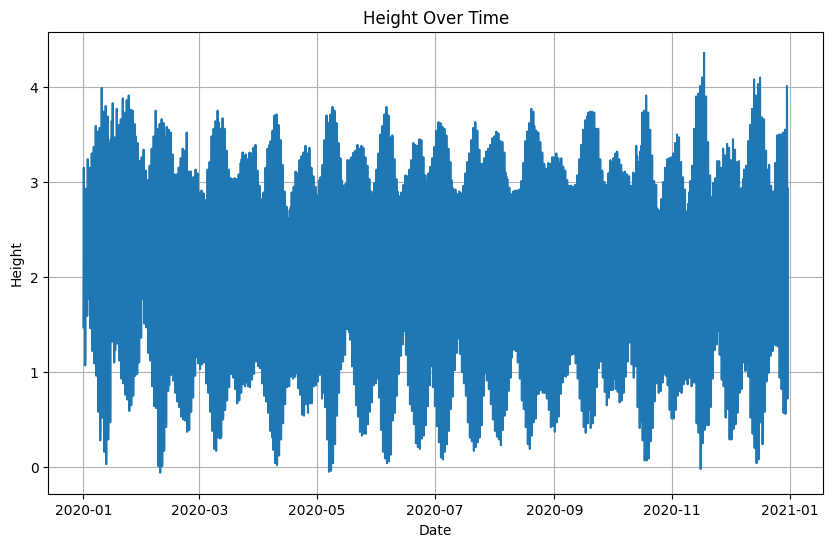

In [ ]:
#plot the entire dataset
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Height'])
plt.title('Height Over Time')
plt.xlabel('Date')
plt.ylabel('Height')
plt.grid(True)
plt.show()

Determine a 30 day period to use in analysis. Explain why

---



Analysis period: 2020-07-01 00:00:00 to 2020-07-31 00:00:00
Number of samples: 718


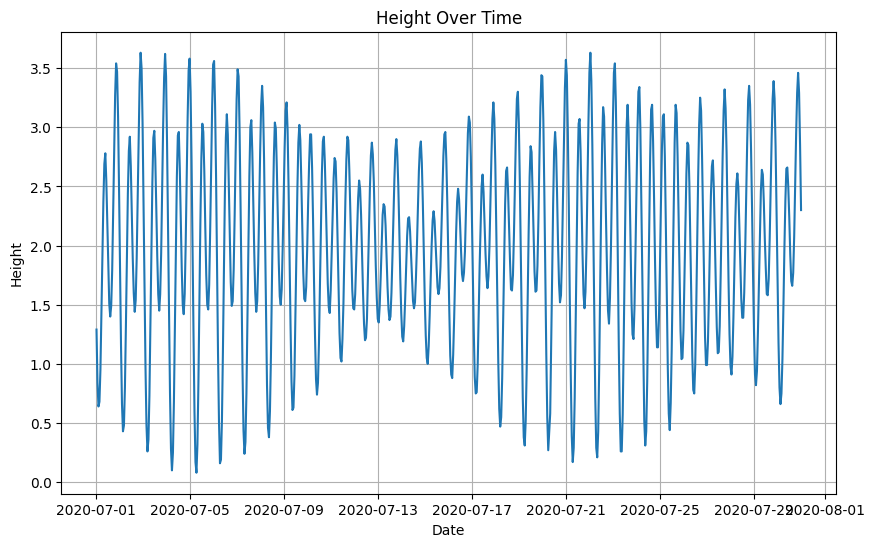

In [ ]:
#choose the 30 day period of July 1 to July 30 as a period for analysis
#based on visual inspection of the total dataset visualised above, no crazy peaks
#based on rainfall data, July has the least rain which makes for better data to analyse

#set the start and end dates
analysis_start_date = pd.to_datetime('2020-07-01')
analysis_end_date = analysis_start_date + pd.DateOffset(days=30)

# Print the chosen period
print(f"Analysis period: {analysis_start_date} to {analysis_end_date}")

# Isonalte data from the chosen period
analysis_data = df[(df['Date'] > analysis_start_date) & (df['Date'] <= analysis_end_date)]
print(f"Number of samples: {len(analysis_data.index)}")

#plot data from the chosen period
plt.figure(figsize=(10, 6))
plt.plot(analysis_data['Date'], analysis_data['Height'])
plt.title('Height Over Time')
plt.xlabel('Date')
plt.ylabel('Height')
plt.grid(True)
plt.show()

Determine the 10 most important tidal coefficients, including their
frequency, magnitude, and phase. Present this data in a table

In [ ]:
# Calculate the sampling frequency
fs = len(analysis_data.index) / (analysis_end_date - analysis_start_date).days
#time array for sampling rate
t = analysis_data['Date']
#signal that we're deconstructing
xt = analysis_data['Height']

# Calculate the sampling period
sampling_period = 1 / fs

# Number of samples
N = len(analysis_data.index)

# Print the results
print(f"Sampling frequency: {fs} Hz")
print(f"Sampling period: {sampling_period} seconds")
print(f"Number of samples: {N}")

Sampling frequency: 23.933333333333334 Hz
Sampling period: 0.04178272980501393 seconds
Number of samples: 718


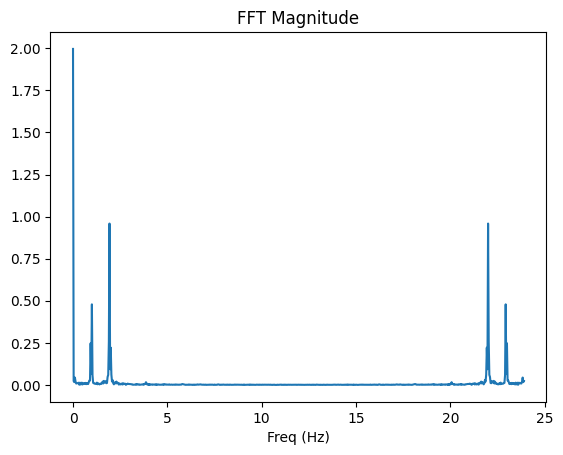

In [ ]:
#fourier transform the data, specify that we're using all data points
ft = np.fft.fft(xt, N)
#get rid of the imaginary part to calculate magnitude
yt = np.real(np.abs(ft))
#calculate phase angle
pt = np.angle(ft)
#calculate bandwidth
dF = fs / N
#calculate frequency
freq = dF * np.arange(N)

#to return correctly scaled array, divide FFT magnitude array by N, and multiply all values except first one by 2
ytCorrectlyScaled = np.concatenate(([yt[0]/N], 2*yt[1:N]/N))

# Plot for FFT Magnitude
plt.plot(freq, ytCorrectlyScaled)
plt.xlabel("Freq (Hz)")
plt.title("FFT Magnitude")
plt.show()

In [ ]:
# Sort the magnitudes and get the corresponding indices
sorted_indices = np.argsort(ytCorrectlyScaled)[::-1]

# Select the top 10 indices
top_indices = sorted_indices[:10]

# Initialize lists to store frequency, magnitude, and phase values
top_freq = []
top_magnitude = []
top_phase = []

# Populate the lists with the top 10 values
for i in top_indices:
    top_freq.append(freq[i])
    top_magnitude.append(ytCorrectlyScaled[i])
    top_phase.append(pt[i])

# Create a DataFrame to store the data
data = {
    "Frequency (Hz)": top_freq,
    "Magnitude": top_magnitude,
    "Phase (radians)": top_phase
}
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

   Frequency (Hz)  Magnitude  Phase (radians)
0        0.000000   1.995947     1.162059e-17
1       22.000000   0.958615    -2.112198e+00
2        1.933333   0.958615     2.112198e+00
3        1.000000   0.478684     1.397738e+00
4       22.933333   0.478684    -1.397738e+00
5        1.900000   0.258389     2.163020e+00
6       22.033333   0.258389    -2.163020e+00
7       23.000000   0.247397    -2.873398e+00
8        0.933333   0.247397     2.873398e+00
9       21.933333   0.221545    -5.382763e-02


Communicate your method and results. Defend your method and outline how you verified your results against the actual data for that 30 day period. Use a combination of
words and graphics